Import Packages

In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [22]:
parent_dir = '../../../data/thread_ring/4/'

N = 500_000
R = 100_000_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}4/thread_ring_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}4/thread_ring_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}4/thread_ring_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}4/thread_ring_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [23]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Apr 18 18:33:52 2025 +0200) (510.20ms ela...,0.2970,0.00000,0.279,0.42,0.10,6.71,56.85 C,Nominal
1,(Fri Apr 18 18:33:52 2025 +0200) (508.27ms ela...,1.3300,0.03460,0.358,1.59,0.31,25.01,56.85 C,Nominal
2,(Fri Apr 18 18:33:53 2025 +0200) (509.50ms ela...,0.2320,0.00012,0.286,0.36,0.13,7.11,56.87 C,Nominal
3,(Fri Apr 18 18:33:53 2025 +0200) (508.51ms ela...,0.2370,0.00000,0.294,0.37,0.12,6.90,56.87 C,Nominal
4,(Fri Apr 18 18:33:54 2025 +0200) (508.51ms ela...,0.0775,0.00000,0.270,0.15,0.05,3.47,56.57 C,Nominal


In [24]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(498, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Apr 18 18:34:04 2025 +0200) (1008.95ms el...,38.7,0.0000,1.09,41.08,3.88,98.13,59.32 C,Nominal
1,(Fri Apr 18 18:34:05 2025 +0200) (1004.70ms el...,35.1,0.0000,1.09,38.21,3.94,98.97,62.56 C,Nominal
2,(Fri Apr 18 18:34:06 2025 +0200) (1005.43ms el...,35.4,0.0000,1.17,38.50,3.79,97.80,64.83 C,Nominal
3,(Fri Apr 18 18:34:07 2025 +0200) (1005.56ms el...,37.0,0.0000,1.14,40.13,3.89,99.04,67.69 C,Nominal
4,(Fri Apr 18 18:34:08 2025 +0200) (1004.79ms el...,37.8,0.0131,1.11,40.86,3.96,99.55,70.21 C,Nominal


In [25]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Apr 18 18:45:35 2025 +0200) (512.07ms ela...,0.1240,0.0000,0.270,0.20,0.06,4.65,47.16 C,Nominal
1,(Fri Apr 18 18:45:36 2025 +0200) (508.45ms ela...,0.1290,0.0345,0.345,0.24,0.07,4.62,47.16 C,Nominal
2,(Fri Apr 18 18:45:36 2025 +0200) (508.17ms ela...,1.1000,0.0000,0.299,1.22,0.19,15.54,47.22 C,Nominal
3,(Fri Apr 18 18:45:37 2025 +0200) (507.43ms ela...,0.0724,0.0000,0.264,0.10,0.04,2.14,47.22 C,Nominal
4,(Fri Apr 18 18:45:37 2025 +0200) (508.00ms ela...,0.0691,0.0000,0.278,0.12,0.04,2.96,47.25 C,Nominal


In [26]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(622, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Apr 18 18:45:47 2025 +0200) (1011.04ms el...,17.90,0.000000,0.74,18.64,2.28,96.00,47.70 C,Nominal
1,(Fri Apr 18 18:45:48 2025 +0200) (1006.22ms el...,11.90,0.000000,1.04,12.76,1.39,98.77,49.72 C,Nominal
2,(Fri Apr 18 18:45:49 2025 +0200) (1007.89ms el...,9.77,0.000000,1.30,10.83,1.01,99.43,51.34 C,Nominal
3,(Fri Apr 18 18:45:50 2025 +0200) (1006.66ms el...,10.10,0.000909,1.32,11.15,1.04,99.12,52.78 C,Nominal
4,(Fri Apr 18 18:45:51 2025 +0200) (1006.97ms el...,9.74,0.000000,1.30,10.81,1.01,99.39,53.80 C,Nominal


Clean the Data

In [27]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [28]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [29]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-18 18:33:52,0.2970,0.00000,0.279,0.42,0.10,6.71,56.85,Nominal,510.20
1,2025-04-18 18:33:52,1.3300,0.03460,0.358,1.59,0.31,25.01,56.85,Nominal,508.27
2,2025-04-18 18:33:53,0.2320,0.00012,0.286,0.36,0.13,7.11,56.87,Nominal,509.50
3,2025-04-18 18:33:53,0.2370,0.00000,0.294,0.37,0.12,6.90,56.87,Nominal,508.51
4,2025-04-18 18:33:54,0.0775,0.00000,0.270,0.15,0.05,3.47,56.57,Nominal,508.51


In [30]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(498, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-18 18:34:04,38.7,0.0000,1.09,41.08,3.88,98.13,59.32,Nominal,1008.95
1,2025-04-18 18:34:05,35.1,0.0000,1.09,38.21,3.94,98.97,62.56,Nominal,1004.70
2,2025-04-18 18:34:06,35.4,0.0000,1.17,38.50,3.79,97.80,64.83,Nominal,1005.43
3,2025-04-18 18:34:07,37.0,0.0000,1.14,40.13,3.89,99.04,67.69,Nominal,1005.56
4,2025-04-18 18:34:08,37.8,0.0131,1.11,40.86,3.96,99.55,70.21,Nominal,1004.79


In [31]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-18 18:45:35,0.1240,0.0000,0.270,0.20,0.06,4.65,47.16,Nominal,512.07
1,2025-04-18 18:45:36,0.1290,0.0345,0.345,0.24,0.07,4.62,47.16,Nominal,508.45
2,2025-04-18 18:45:36,1.1000,0.0000,0.299,1.22,0.19,15.54,47.22,Nominal,508.17
3,2025-04-18 18:45:37,0.0724,0.0000,0.264,0.10,0.04,2.14,47.22,Nominal,507.43
4,2025-04-18 18:45:37,0.0691,0.0000,0.278,0.12,0.04,2.96,47.25,Nominal,508.00


In [32]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(622, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-18 18:45:47,17.90,0.000000,0.74,18.64,2.28,96.00,47.70,Nominal,1011.04
1,2025-04-18 18:45:48,11.90,0.000000,1.04,12.76,1.39,98.77,49.72,Nominal,1006.22
2,2025-04-18 18:45:49,9.77,0.000000,1.30,10.83,1.01,99.43,51.34,Nominal,1007.89
3,2025-04-18 18:45:50,10.10,0.000909,1.32,11.15,1.04,99.12,52.78,Nominal,1006.66
4,2025-04-18 18:45:51,9.74,0.000000,1.30,10.81,1.01,99.39,53.80,Nominal,1006.97


Visualize the Data

In [33]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


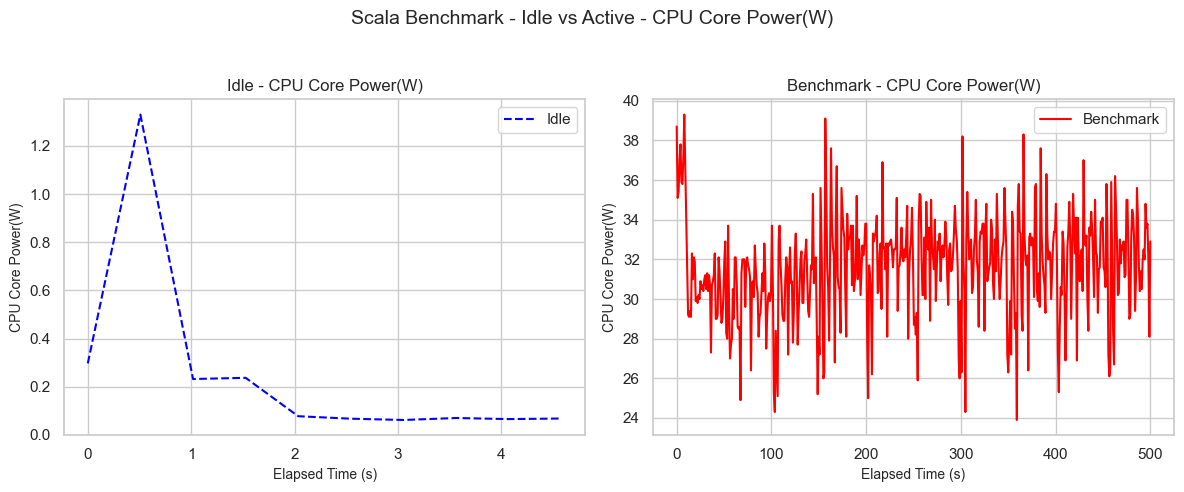

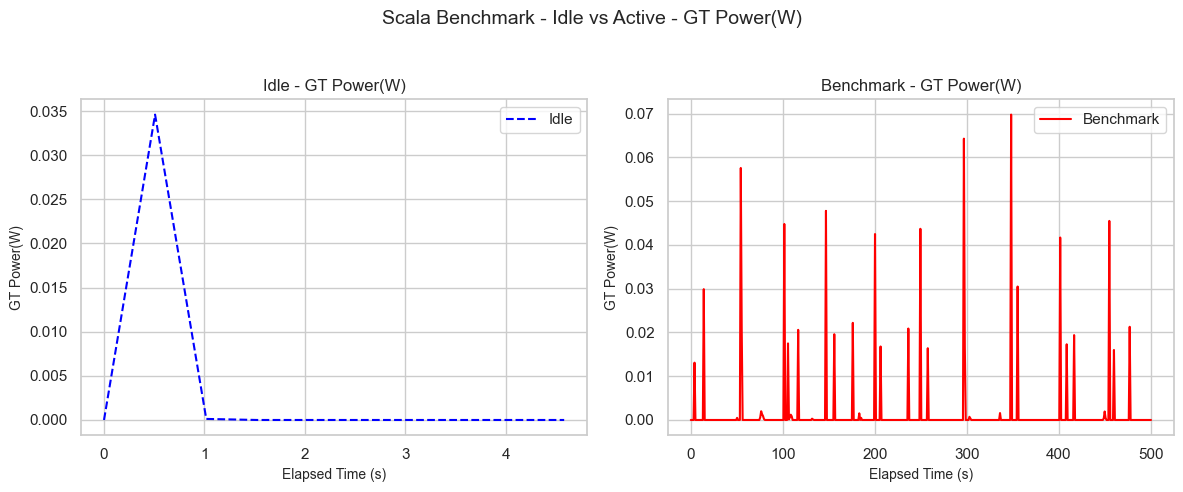

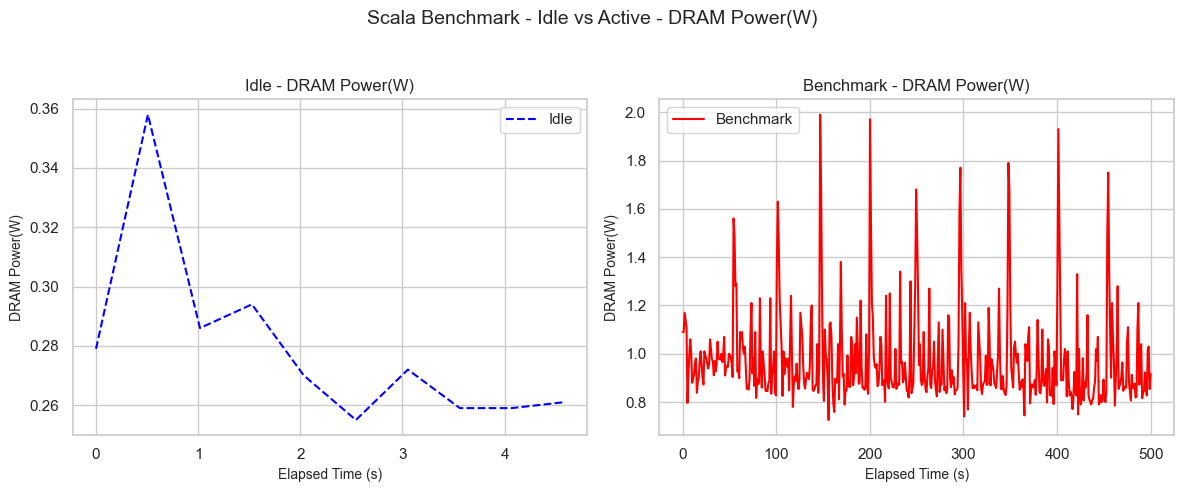

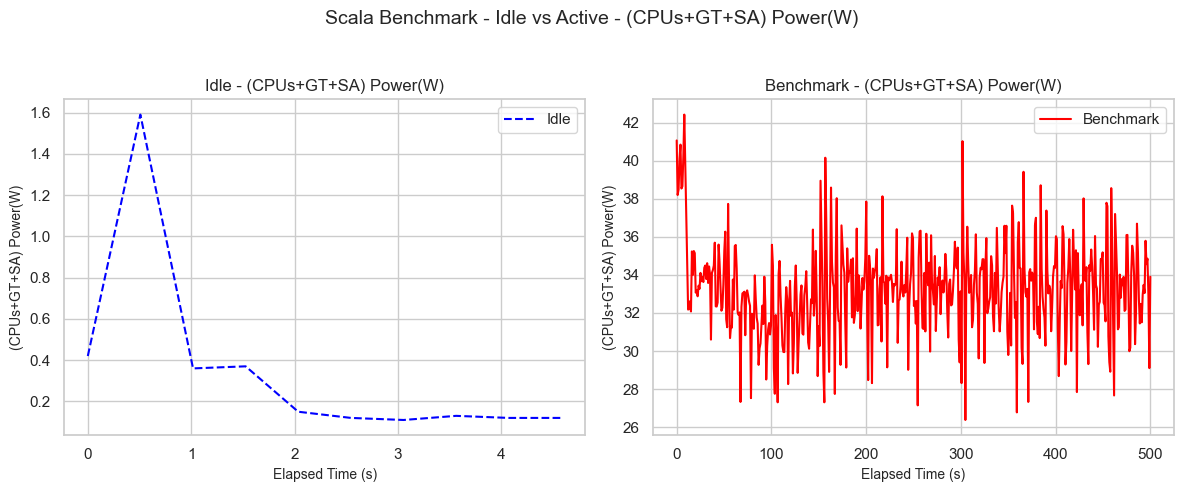

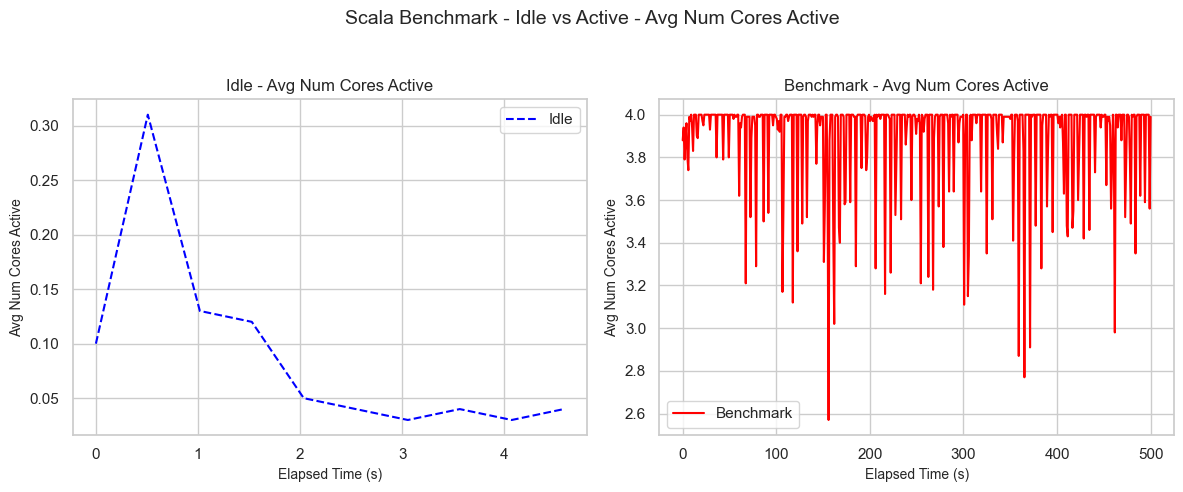

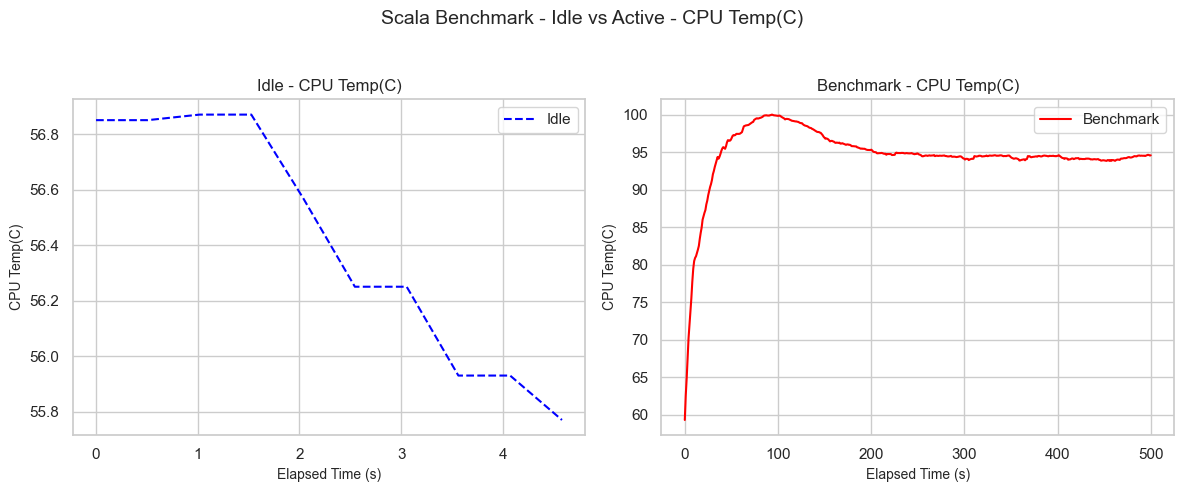

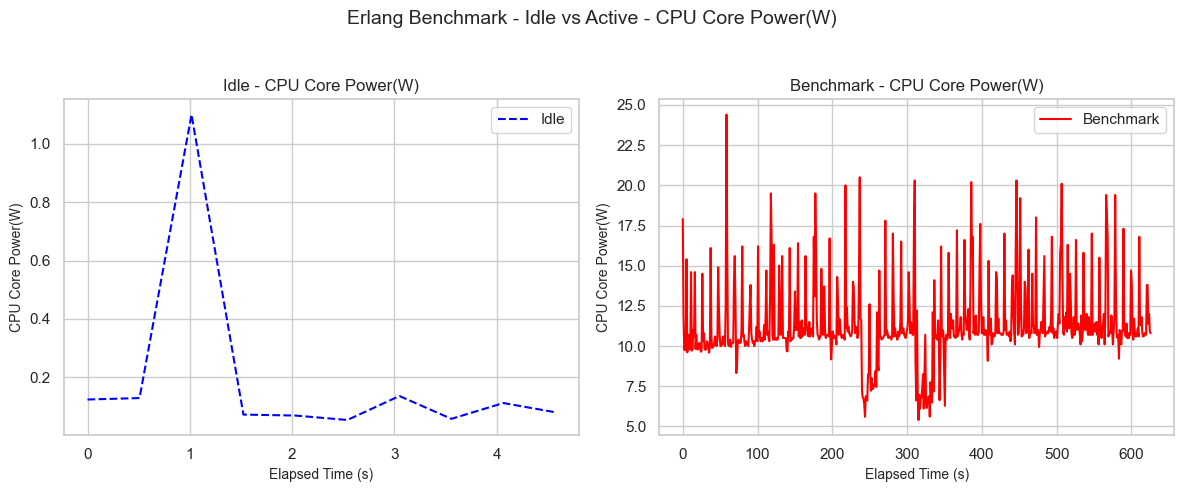

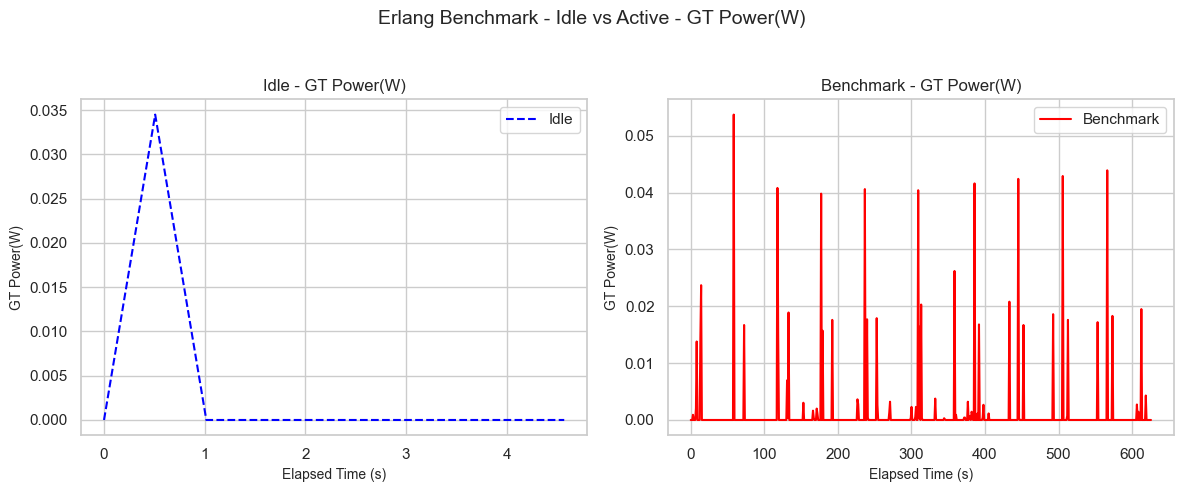

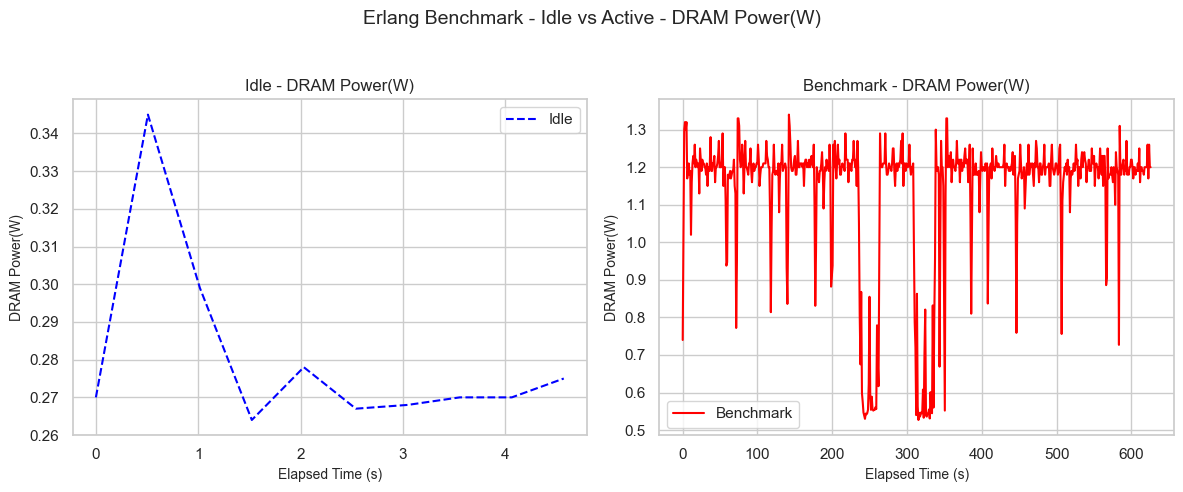

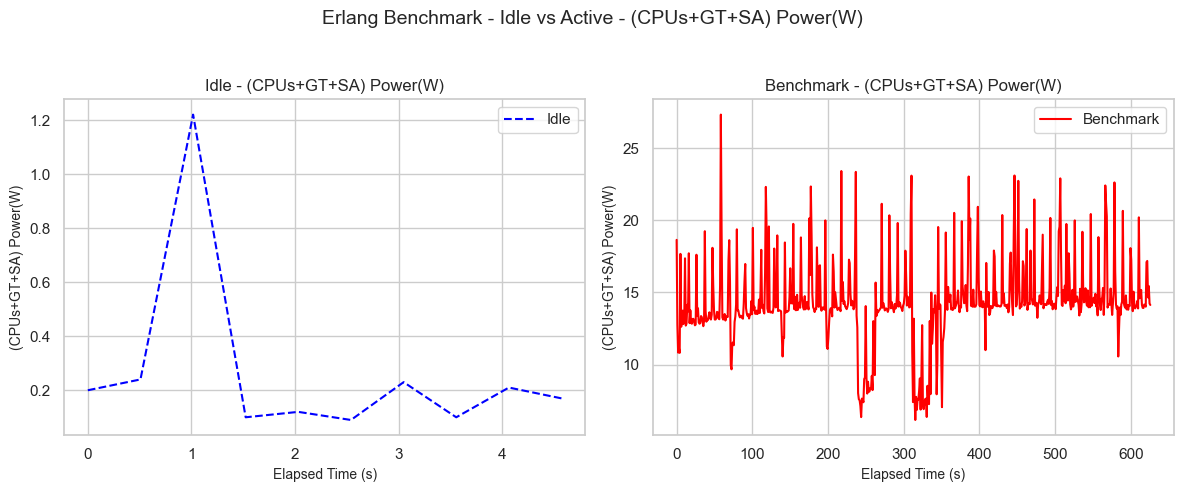

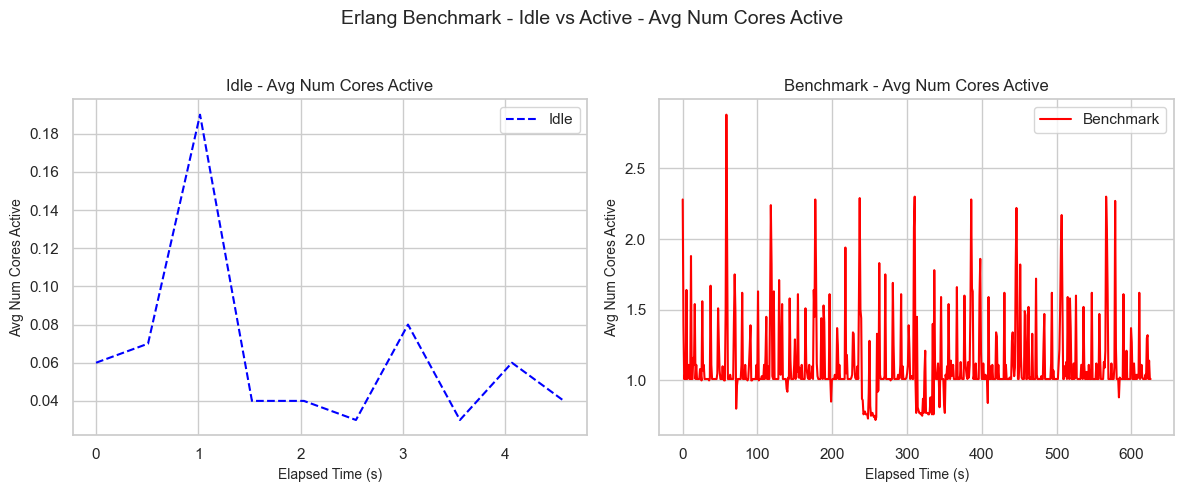

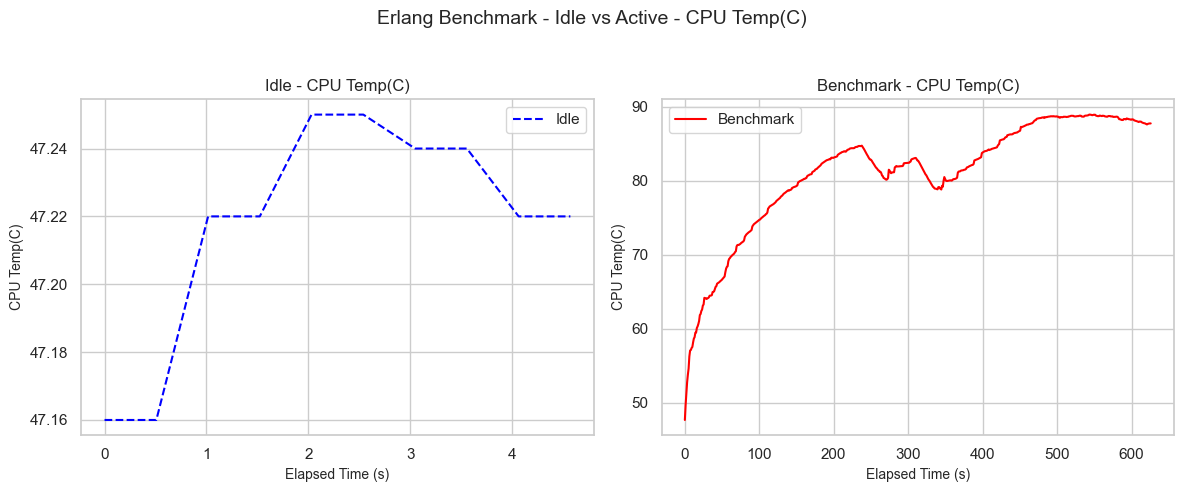

In [34]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [35]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        # ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [36]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

n = format_number_str(N)
r = format_number_str(R)
title_config_prefix = f"({n} Actors, {r} Rounds, {ITERATIONS} Iterations)"

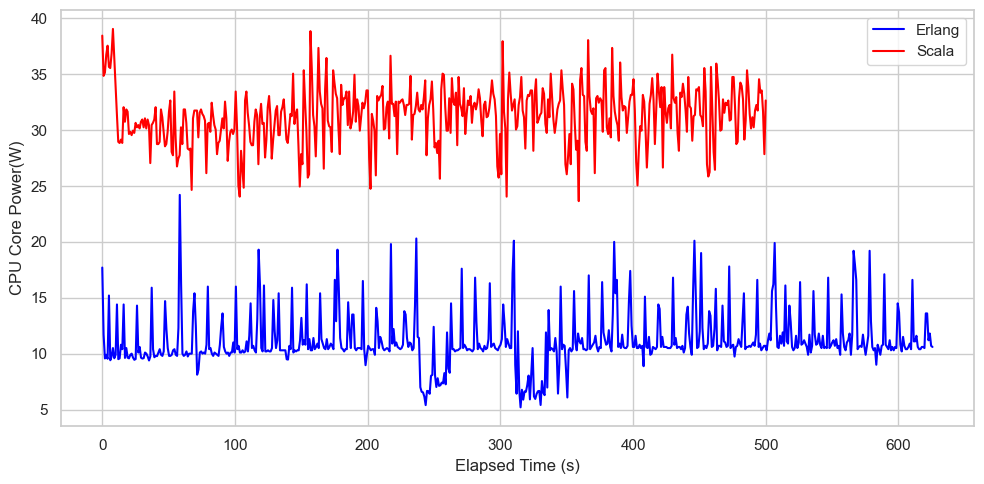

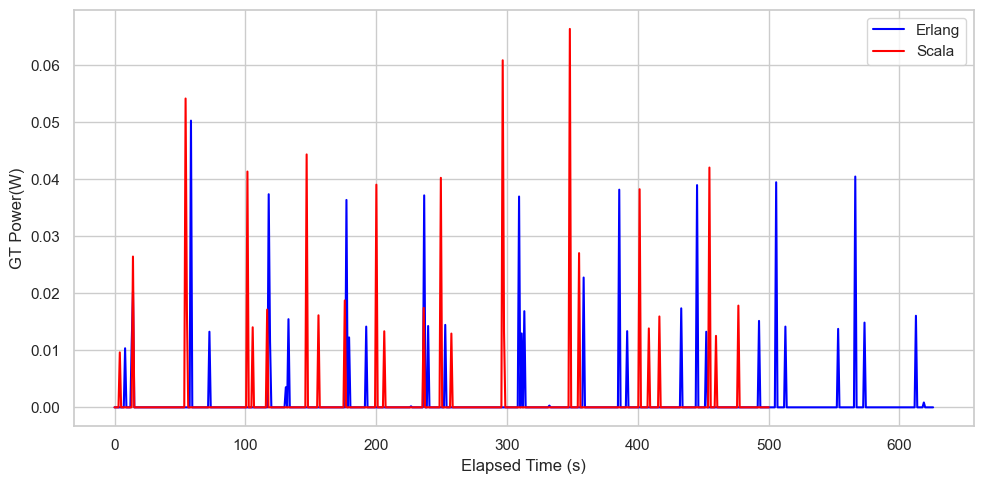

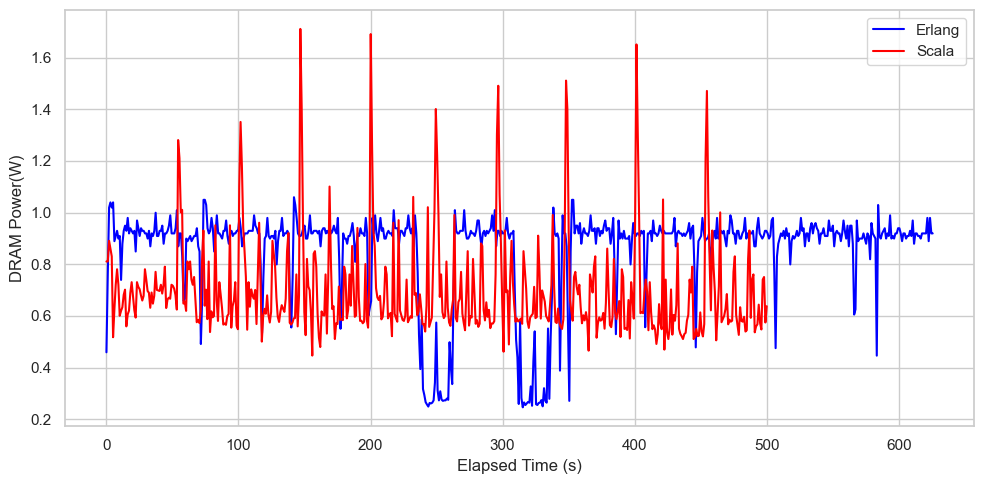

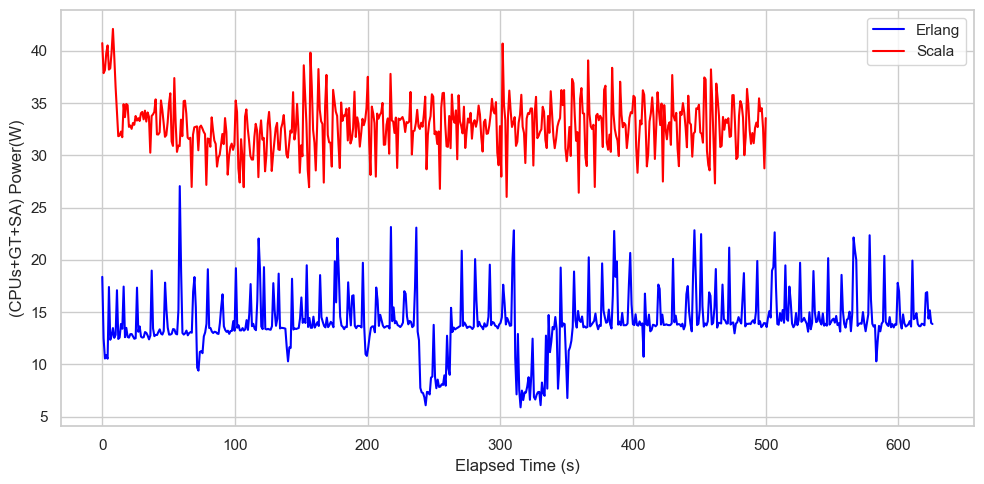

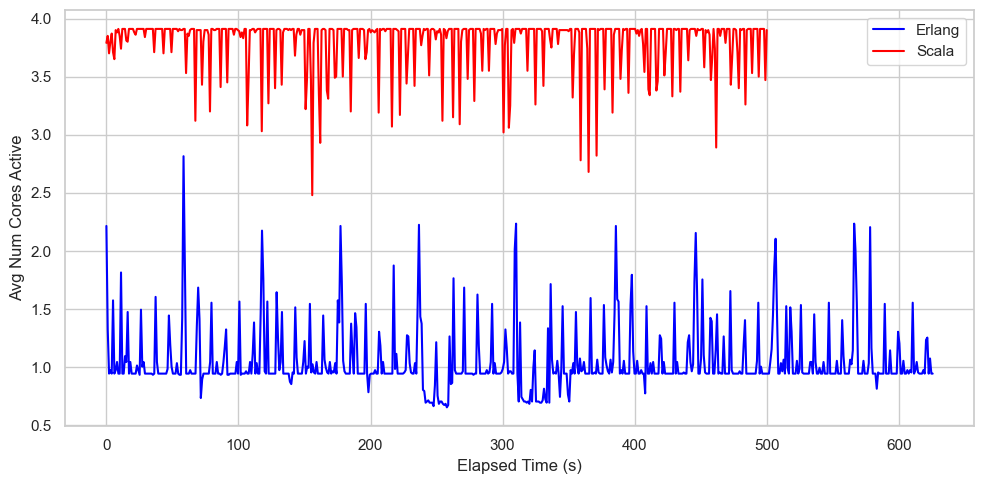

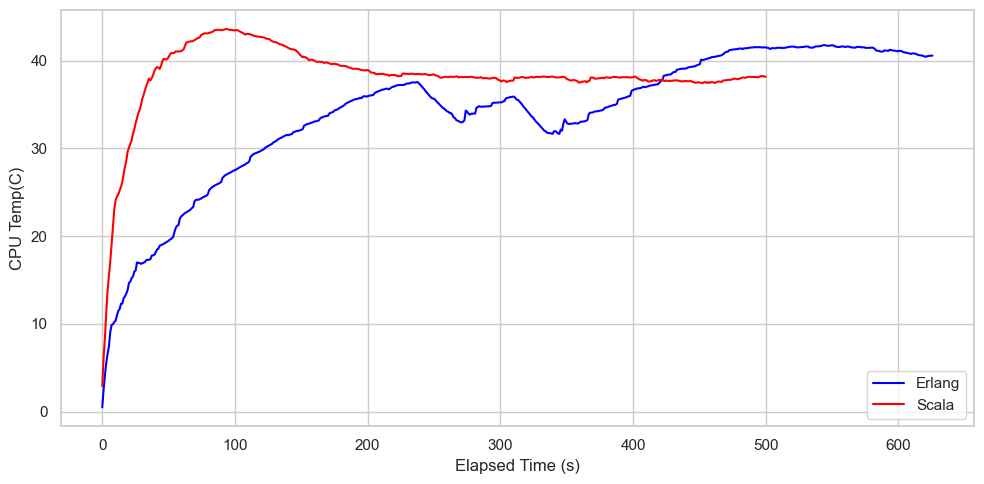

In [37]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Thread-Ring Benchmark {title_config_prefix}")


Compute Average Metrics

In [38]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [39]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Scala Idle Metrics:")
print(scala_idle_means, "\n")
print("Erlang Idle Metrics:")
print(erlang_idle_means, "\n")
print("Scala Benchmark Metrics:")
print(scala_bench_data[metrics_columns].mean(), "\n")
print("Erlang Benchmark Metrics:")
print(erlang_bench_data[metrics_columns].mean(), "\n")

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Scala Idle Metrics:
CPU Core Power(W)         0.250630
GT Power(W)               0.003472
DRAM Power(W)             0.279300
(CPUs+GT+SA) Power(W)     0.349000
CPU Temp(C)              56.414000
Avg Num Cores Active      0.089000
dtype: float64 

Erlang Idle Metrics:
CPU Core Power(W)         0.19345
GT Power(W)               0.00345
DRAM Power(W)             0.28060
(CPUs+GT+SA) Power(W)     0.26800
CPU Temp(C)              47.21800
Avg Num Cores Active      0.06400
dtype: float64 

Scala Benchmark Metrics:
CPU Core Power(W)        31.584739
GT Power(W)               0.001592
DRAM Power(W)             0.973444
(CPUs+GT+SA) Power(W)    33.228193
CPU Temp(C)              94.643876
Avg Num Cores Active      3.898815
dtype: float64 

Erlang Benchmark Metrics:
CPU Core Power(W)        11.330997
GT Power(W)               0.001338
DRAM Power(W)             1.135984
(CPUs+GT+SA) Power(W)    14.279598
CPU Temp(C)              81.157283
Avg Num Cores Active      1.118891
dtype: float64 

Net Av

Compute Total Energy Consumption

In [40]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time


# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "R": R,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy,
    "Erlang Total Time(s)": erlang_total_time,
    "Scala Total Time(s)": scala_total_time,
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["R"] == R) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "R =", R, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../../data/thread_ring/4/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 16046.770841775317 Joules
Erlang Benchmark: 7516.075212114983 Joules
